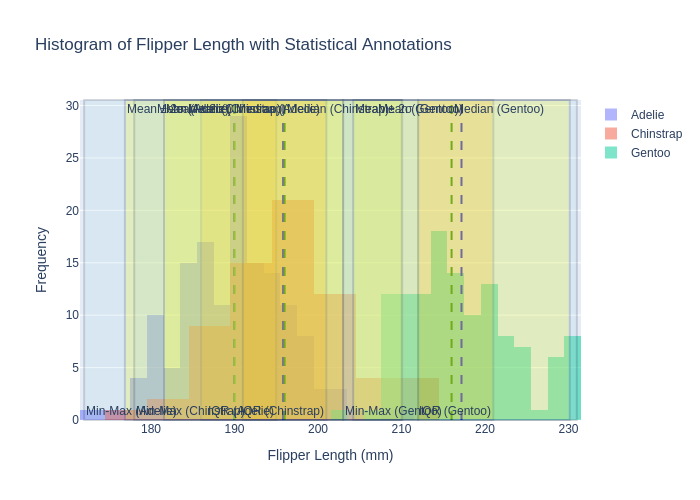

In [1]:
# 1. 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Calculate required statistics for each species
stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean',
    median='median',
    min='min',
    max='max',
    std='std',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Create histograms and add lines and rectangles for each species
fig = go.Figure()

for species, group in penguins.groupby('species'):
    # Plot histogram for each species
    fig.add_trace(go.Histogram(
        x=group['flipper_length_mm'],
        name=f'{species}',
        opacity=0.5
    ))
    
    # Get stats for current species
    species_stats = stats[stats['species'] == species].iloc[0]
    
    # Mean and median lines
    fig.add_vline(x=species_stats['mean'], line=dict(color='blue', width=2, dash='dash'),
                  annotation_text=f'Mean ({species})', annotation_position="top left")
    fig.add_vline(x=species_stats['median'], line=dict(color='green', width=2, dash='dash'),
                  annotation_text=f'Median ({species})', annotation_position="top right")
    
    # Min-Max range rectangle
    fig.add_vrect(
        x0=species_stats['min'], x1=species_stats['max'], 
        fillcolor="lightblue", opacity=0.2, 
        annotation_text=f'Min-Max ({species})', annotation_position="bottom left"
    )
    
    # Interquartile range rectangle
    fig.add_vrect(
        x0=species_stats['q1'], x1=species_stats['q3'], 
        fillcolor="orange", opacity=0.2, 
        annotation_text=f'IQR ({species})', annotation_position="bottom right"
    )
    
    # Mean ± 2 std range rectangle
    fig.add_vrect(
        x0=species_stats['mean'] - 2 * species_stats['std'], 
        x1=species_stats['mean'] + 2 * species_stats['std'], 
        fillcolor="yellow", opacity=0.2, 
        annotation_text=f'Mean ± 2σ ({species})', annotation_position="top left"
    )

# Update layout for better visualization
fig.update_layout(title='Histogram of Flipper Length with Statistical Annotations',
                  xaxis_title='Flipper Length (mm)',
                  yaxis_title='Frequency',
                  barmode='overlay')

fig.show(renderer="png")

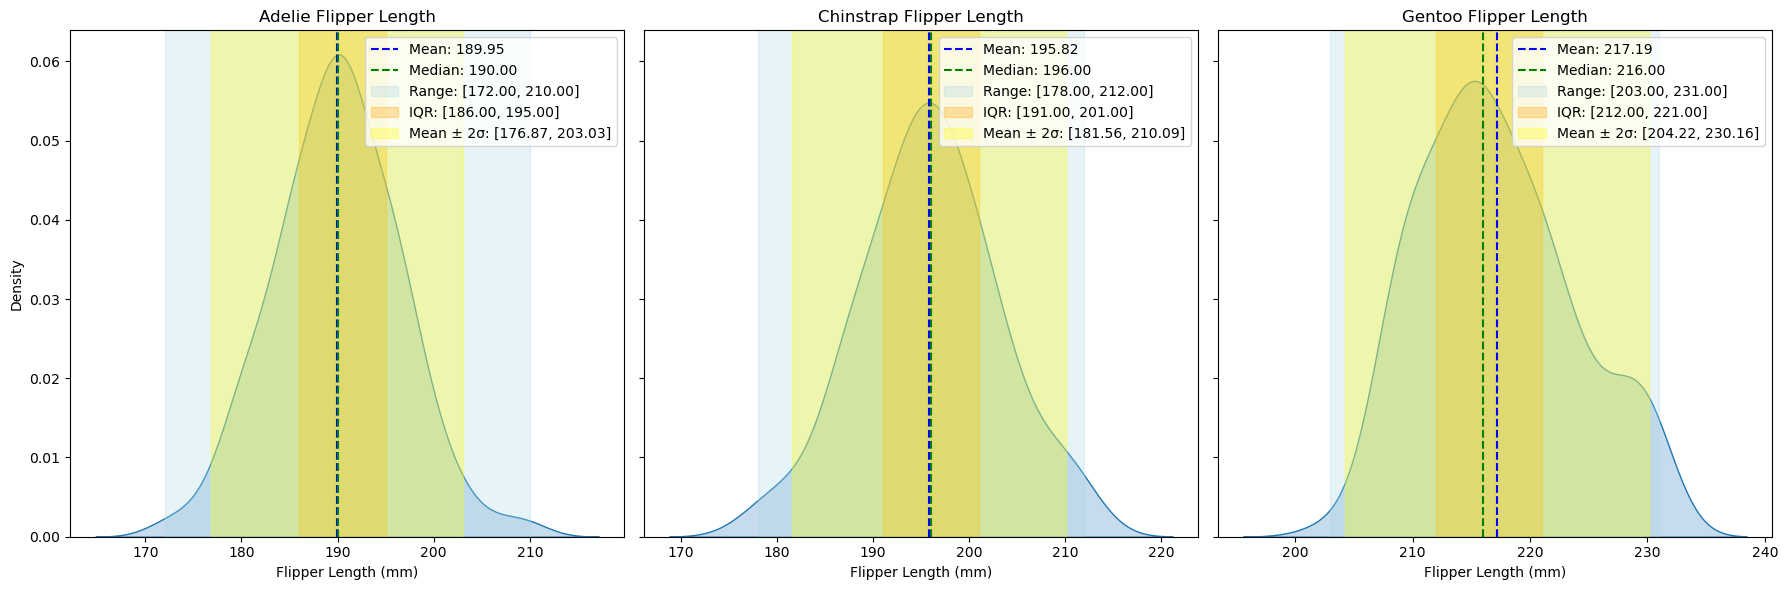

In [16]:
# 2.
# Remove rows with NaN values in flipper_length_mm
import matplotlib.pyplot as plt
import seaborn as sns
penguins_clean = penguins.dropna(subset=['flipper_length_mm'])

# Plot KDE and add statistical annotations for each species
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
colors = {
    'mean': 'blue',
    'median': 'green',
    'min-max': 'lightblue',
    'iqr': 'orange',
    'std_range': 'yellow'
}
# Plot KDE for each species and add annotations
for ax, (species, group) in zip(axes, penguins_clean.groupby('species')):
    sns.kdeplot(data=group, x='flipper_length_mm', ax=ax, fill=True)
    ax.set_title(f'{species} Flipper Length')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')
    
    # Calculate statistics
    mean = group['flipper_length_mm'].mean()
    median = group['flipper_length_mm'].median()
    min_val = group['flipper_length_mm'].min()
    max_val = group['flipper_length_mm'].max()
    std = group['flipper_length_mm'].std()
    q1 = group['flipper_length_mm'].quantile(0.25)
    q3 = group['flipper_length_mm'].quantile(0.75)
    
    # Add vertical lines for mean and median
    ax.axvline(mean, color=colors['mean'], linestyle='--', label=f'Mean: {mean:.2f}')
    ax.axvline(median, color=colors['median'], linestyle='--', label=f'Median: {median:.2f}')
    
    # Add shaded areas for min-max, IQR, and mean ± 2 std range
    ax.axvspan(min_val, max_val, color=colors['min-max'], alpha=0.3, label=f'Range: [{min_val:.2f}, {max_val:.2f}]')
    ax.axvspan(q1, q3, color=colors['iqr'], alpha=0.3, label=f'IQR: [{q1:.2f}, {q3:.2f}]')
    ax.axvspan(mean - 2 * std, mean + 2 * std, color=colors['std_range'], alpha=0.3, 
               label=f'Mean ± 2σ: [{mean - 2*std:.2f}, {mean + 2*std:.2f}]')
    
    # Add legend
    ax.legend()

plt.tight_layout()
plt.show("png")

In [ ]:
# 3.
# Box plots
# Pros: Gives clear summary statistics (IQR, median, Q1, Q3,), Space effecient, Shows outliers
# Cons: Doesn't show distribution shape, Limited Detail

# Histograms
# Pros: Shows shape distribution, Shows frequency, Very intuitive to observe and analyze the data
# Cons: Size of bins drastically effects appearance of the graph, Can be hard to compare

# Kernel Density Estimators
# Pros: Smooth distribution, Good for small sample sizes, easy to interpret data
# Cons: Less Intuitive, can't see the exact frequency

# Overall KDE's are probably the best out of the 3 types of graphs, although it may be harder to interpret, KDE's are able
# to show the most data while maintaining the least amount of cons that the other two graphs have. It is able to display the
# data similar to the box plots, while also showing a visually useful graph like the histogram

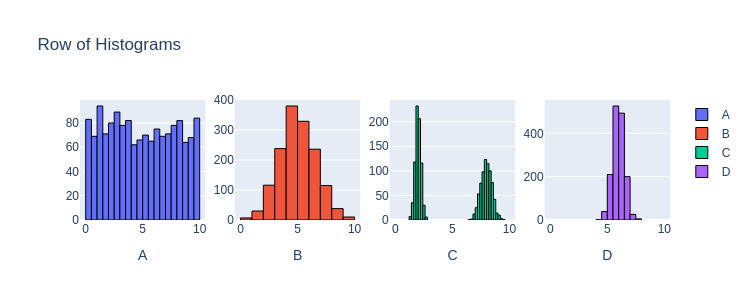

In [14]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# 4
# 1. B and D have similar means and variances
# 2. B and C have similar means but different variances
# 3. A and C have similar variances but different means
# 4. A and D have different means and variances

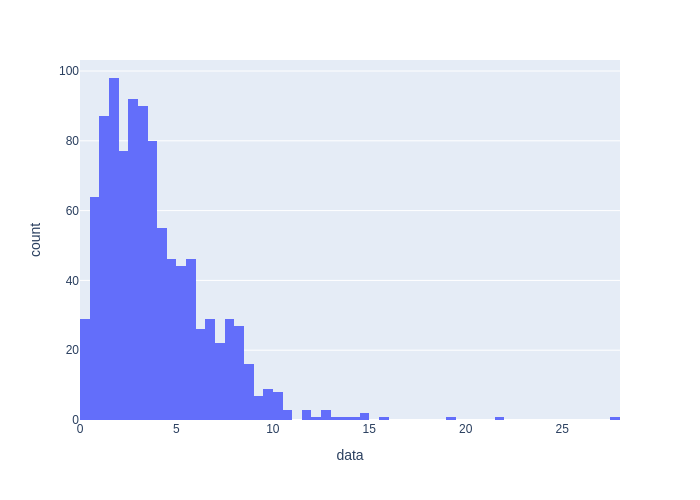

In [25]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

fig1.show(renderer="png")

# 5.
# Mean is adding up all the values and dividing by the number of items
# Median is counting all the values, sorting them in order and then taking the middle value (Q2)
# Left skew is when most of the data sits to the left
# Right skew is when most of the data sits the the right
# The mean of positively skewed data is greater than the median
# In left skewed distribution, the mean of negatively skewed data is less than the median

In [26]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [28]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [ ]:
# 9. Somewhat